In [1]:
#export
from jetbot import Camera,bgr8_to_jpeg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
# from PIL import Image
from exp.nb_02 import convert_bgr_to_rgb

from pathlib import Path

In [2]:
c = Camera()
c.fps = 10
c.start()

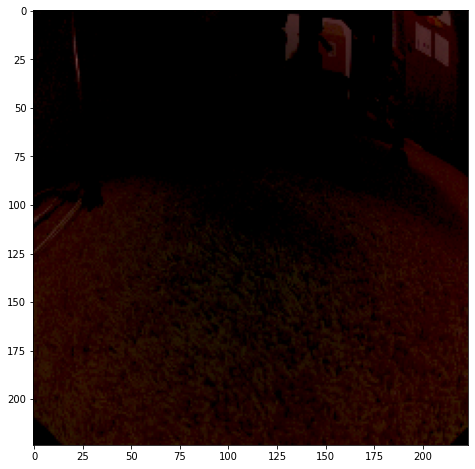

In [3]:
img = convert_bgr_to_rgb(c.value).astype('uint8')
plt.figure(figsize = (8,8))
plt.imshow(img)

In [4]:
#export
def get_red(img):    
    img[img<200]=0
    red = img[:,:,0] 
    avg = red.mean()
    std = red.std()    
    newimg = red>(avg+std)
    return newimg

In [5]:
#export
def get_middle_red(img):
    img = get_red(img)
    line = np.arange(0,224)
    middles, row_id = [], []
    for i in range(224):
        row = img[i,:]
        redpoints = line[row]        
        if len(redpoints)>10: # min threshold set here
            middles.append(redpoints.mean()) 
            row_id.append(i)  
    if len(middles)>0:
        middles = np.array(middles)
        return middles.mean(), middles   , row_id   
    else:
        return 224/2,[],[]
        

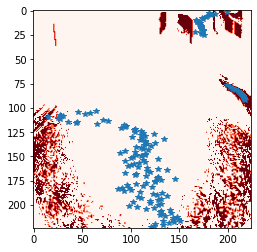

In [6]:
img = convert_bgr_to_rgb(c.value)
r =get_red(img)
middle_avg, middles, row_id  = get_middle_red(img)
plt.imshow(get_red(img), cmap = 'Reds')
plt.plot(middles, row_id, '*')
    

In [13]:
#export
mid = 224./2

def normalize(x): return (x-mid)/mid

def steer_robot(steer_value, robot = None, power =1.0):
    left = np.minimum(np.maximum(steer_value+0.5,0),1)
    right = np.maximum(1-left,0)
    left, right = left*power, right*power
    if robot is not None: robot.set_motors(left, right)
    print(f"{left}, {right},{steer_value} left:right:steer_value")

In [14]:
for j in range(10):
    img = convert_bgr_to_rgb(c.value)
    middle_avg, middles, y  = get_middle_red(img)    
    steer_norm = normalize(middle_avg)
    time.sleep(0.2)
#     print(steer_norm, middle_avg)
    steer_robot(steer_norm)

0.7088128223629376, 0.29118717763706237,0.2088128223629376 left:right:steer_value
0.694864235049131, 0.305135764950869,0.19486423504913095 left:right:steer_value
0.7019215064236352, 0.29807849357636484,0.20192150642363518 left:right:steer_value
0.7016259134770508, 0.29837408652294917,0.2016259134770509 left:right:steer_value
0.6995397615127676, 0.30046023848723236,0.1995397615127677 left:right:steer_value
0.7324298852428779, 0.2675701147571221,0.2324298852428779 left:right:steer_value
0.7208809188995355, 0.27911908110046446,0.22088091889953557 left:right:steer_value
0.7029699421660216, 0.2970300578339784,0.20296994216602166 left:right:steer_value
0.7069007405966214, 0.29309925940337855,0.20690074059662145 left:right:steer_value
0.6934258066440017, 0.30657419335599834,0.19342580664400164 left:right:steer_value


In [15]:
c.stop()


In [16]:
del c

In [12]:
np.maximum(1,2)

2

In [ ]:
minimum